Chapter 20
# 三种天气状况
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
T = np.matrix([[0.7, 0.45, 0.55],
               [0.25, 0.3,  0.3],
               [0.05, 0.25, 0.15 ]])

In [4]:
A = T.T
# 使用邻接矩阵创建有向图
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# 修改节点名称
G = nx.relabel_nodes(G, {0: 'Sun', 1: 'Cloud', 2: 'Rain'})

list(G.edges())

[('Sun', 'Sun'),
 ('Sun', 'Cloud'),
 ('Sun', 'Rain'),
 ('Cloud', 'Sun'),
 ('Cloud', 'Cloud'),
 ('Cloud', 'Rain'),
 ('Rain', 'Sun'),
 ('Rain', 'Cloud'),
 ('Rain', 'Rain')]

{('Sun', 'Sun'): Text(0.16924220867218978, 1.0, '0.7'),
 ('Sun', 'Cloud'): Text(0.35148726469266034, 0.3040335642072239, '0.25'),
 ('Sun', 'Rain'): Text(-0.26686616035656524, 0.19596643579277612, '0.05'),
 ('Cloud', 'Sun'): Text(0.35148726469266034, 0.3040335642072239, '0.45'),
 ('Cloud', 'Cloud'): Text(0.5337323207131309, -0.39193287158555223, '0.3'),
 ('Cloud', 'Rain'): Text(-0.08462110433609465, -0.5, '0.25'),
 ('Rain', 'Sun'): Text(-0.26686616035656524, 0.19596643579277612, '0.55'),
 ('Rain', 'Cloud'): Text(-0.08462110433609465, -0.5, '0.3'),
 ('Rain', 'Rain'): Text(-0.7029745293853202, -0.6080671284144478, '0.15')}

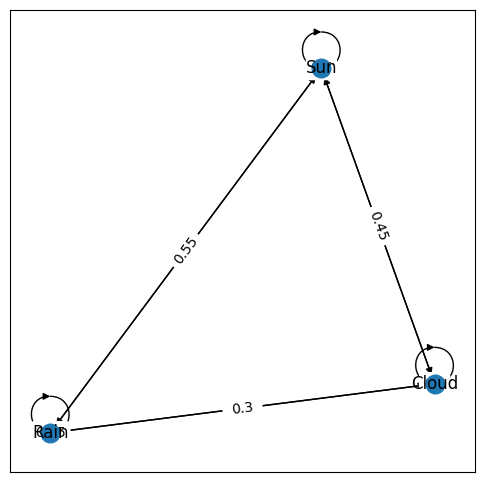

In [7]:
plt.figure(figsize = (6,6))
pos = nx.spring_layout(G,seed=8)
nx.draw_networkx(G, 
                 pos = pos,
                 node_size = 180)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=edge_labels)

In [1]:
# 稳态
sstate = np.linalg.eig(T)[1][:,0]
sstate = sstate/sstate.sum()
print(sstate)

[[0.61538462]
 [0.26923077]
 [0.11538462]]


In [2]:
# initial states
initial_x_3 = np.array([[1, 0, 0],
                        [0, 1, 0],
                        [0, 0, 1]])

num_iterations = 10;

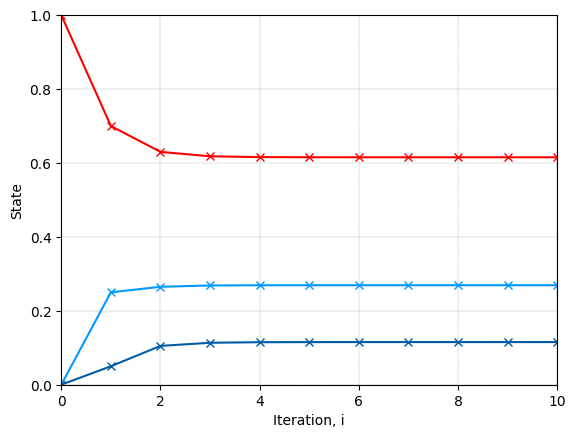

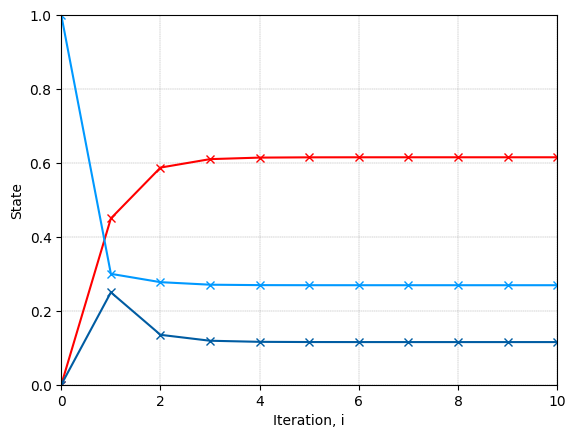

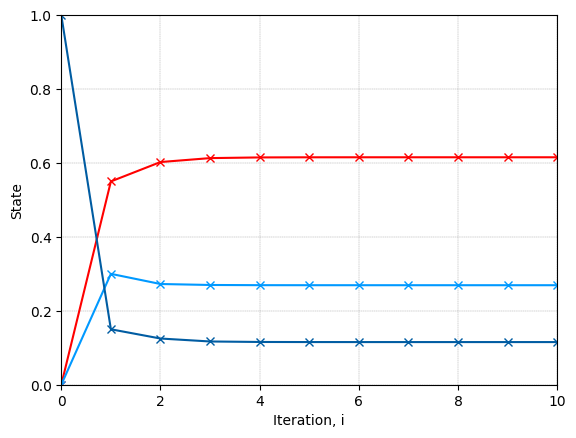

In [3]:
for i in np.arange(0,3):
    
    initial_x = initial_x_3[:,i][:, None]
    
    x_i = np.zeros_like(initial_x)
    x_i = initial_x
    X =   initial_x.T;
    
    # matrix power through iterations
    
    for x in np.arange(0,num_iterations):
        x_i = T@x_i;
        X = np.concatenate([X, x_i.T],axis = 0)
    
    fig, ax = plt.subplots()
    
    itr = np.arange(0,num_iterations+1);
    plt.plot(itr,X[:,0],marker = 'x',color = (1,0,0))
    plt.plot(itr,X[:,1],marker = 'x',color = (0,0.6,1))
    plt.plot(itr,X[:,2],marker = 'x',color = (0,0.36,0.635))
    # decorations
    
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    ax.set_xlim(0, num_iterations)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Iteration, i')
    ax.set_ylabel('State')